&emsp;&emsp;逻辑斯蒂回归在工业界是用地比较多的一种算法。速度快，性能也还不错。

&emsp;&emsp;在感知机模型中$f(x)$:

$$
f(x) = sign(w · x + b)
$$

&emsp;&emsp;只输出`-1`和`+1`太生硬了。超平面左边`0.001`距离和超平面右边`0.001`距离的点真的有天壤之别吗？并且对于$w · x + b=0$这个点是没有定义的，也是不可微分的。感知机由于`sign`不是连续可微的，因此在梯度下降时脱去了壳子`sign`函数，在求梯度的时候都是直接对$w · x + b$进行操作的。

## 逻辑斯谛回归

&emsp;&emsp;逻辑斯蒂回归的定义为：

$$
P(Y=1 | x) = \frac{exp(wx)}{1+exp(wx)}
$$

$$
P(Y=0|x)=\frac{1}{1+exp(wx)}
$$

&emsp;&emsp;这样的话，整个式子是连续可微的。

### 逻辑斯蒂参数估计

- **参数估计**


&emsp;&emsp;逻辑斯蒂回归模型学习时，对于给定的训练数据集$T={(x_{1}, y_{1}), (x_{2}, y_{2}), \cdots, ({x_{N}, y_{N})}}$, 其中，$x_{i} \in R^{n}, y_{i} \in \{0, 1\}$可以应用极大似然估计法估计模型参数，从而得到逻辑斯蒂回归模型。

&emsp;&emsp;设：

$$
P(Y=1 | x) = \pi(x), P(Y=0|x)=1-\pi(x)
$$

&emsp;&emsp;似然函数为：

$$
\prod_{i=1}^{N}[\pi(x_{i})]^{y_{i}}[1-\pi(x_{i})]^{1-y_{i}}
$$

&emsp;&emsp;对数似然函数为：

$$
L(w) = \sum_{i=1}^{N}[y_{i}log \pi(x_{i}) + (1-y_{i})log(1-\pi(x_{i}))] \\
= \sum_{i=1}^{N}[y_{i}log(\frac{\pi(x_{i})}{1-\pi(x_{i})}) + log(1-\pi(x_{i}))]
$$

&emsp;&emsp;对数似然函数的最大化等价于对交叉熵的最小化。

&emsp;&emsp;其中$\pi{(x_{i})} = \frac{exp(wx_{i})}{1+exp(wx_{i})}$, $1-\pi(x_{i})=\frac{1}{1+exp(wx_{i})}$。代入之后可以得到：

$$
L(w) = \sum_{i=1}^{N}[y_{i}(w x_{i}) - log(1+exp(w x_{i}))]
$$

&emsp;&emsp;对$L(w)$求极大值，得到$w$的估计值。

- **对上述问题求解**：

&emsp;&emsp;似然函数对$w$的求导可以分为如下形式：

$$
\frac{\partial L}{\partial w} = \sum_{i=1}^{N}[y_{i} x_{i} - \frac{1}{1 + exp(w x_{i})}exp(w x_{i}) x_{i}] \\
= \sum_{i=1}^{N} y_{i}x_{i} - \frac{x_{i} exp(w x_{i})}{1 + exp(w x_{i})}
$$ 

- **小结**

1. 逻辑斯蒂回归以输出概率的形式解决了极小距离带来的`+1`和`-1`的天壤之别。同时概率也可作为模型输出的置信度。
2. 逻辑斯蒂使得最终的模型函数连续可微。训练目标与预测目标达成了一致。
3. 逻辑斯蒂采用了极大似然估计来估计参数。

### 二项逻辑斯蒂回归模型

### 多项逻辑斯蒂回归

## 最大熵模型

&emsp;&emsp;在我们猜测时，不确定的部分我们认为是等可能的，就好像骰子一样，我们知道有6个面，因此认为每个面的概率是$\frac{1}{6}$, 也就是等可能。换句话说，就是趋向于均匀分布，最大熵就是使用这样一个朴素的道理。**凡是我们知道的，就把它考虑进去，凡是不知道的，通通均匀分布**。

&emsp;&emsp;我们想要求解的目标就是给定$X$的情况下，输出$Y$的概率：$P(Y|X)$。熵的公式是：$H(P) = -\sum_{x} P(x)log P(x)$。将求解目标$P(Y|X)$带入**条件熵**：

$$
H(p(y \mid x))=-\sum_{x, y} \tilde{p}(x) p(y \mid x) \log p(y \mid x)
$$



&emsp;&emsp;我们如何来做呢？我们手中是有训练集的，训练集中有所有样本及对应的标签。

&emsp;&emsp;$\tilde{p}(X=x, Y=y) = \frac{v(X=x, Y=y)}{N}$中的波浪线上标表示经验分布，是从训练集中统计出来的，$v$表示通过频数表示统计的。$\tilde{p}(X=x) = \frac{v(X=x)}{N}$统计$X$的概率分布。在真实分布未知的情况下，我们会用经验分布去近似。

&emsp;&emsp;我们通过观察数据集往往能发现一些事实，例如在一份扔骰子的数据集中，我们发现6朝上占比为$\frac{1}{5}$；再例如一份关于天气的数据集中，我们发现湿度高且多云的天气下，几乎都会下雨。对于这些观察到的事实，往往采用特征函数去表示：

$$
f(\mathbf{x}, y)= \begin{cases}1, & \text { if } \mathbf{x}, y \text { 满足某个事实 } \\ 0, & \text { 其他 }\end{cases}
$$

&emsp;&emsp;接着可以通过这些观察到的事实去约束模型，先定义特征函数关于经验分布$\tilde{P}(\mathbf{x}, y)$的期望值$E_{\tilde{P}}(f)$，和关于联合分布$P(\mathbf{x}, y)$的期望值$E_{P}(f)$。

$$
\begin{aligned}
&E_{\tilde{P}}(f)=\sum_{\mathbf{x}, y} \tilde{P}(\mathbf{x}, y) f(\mathbf{x}, y) \\
&E_{P}(f)=\sum_{\mathbf{x}, y} P(\mathbf{x}, y) f(\mathbf{x}, y)
\end{aligned}
$$

&emsp;&emsp;**特征函数能够把对参数估计有误导项的删除掉**。我们希观察到的特征函数是正确的，即特征函数 [公式] 的期望应该和从训练数据中得到的特征的期望是一样的：

$$
\begin{gathered}
\sum_{\mathbf{x}, y} P(\mathbf{x}, y) f(\mathbf{x}, y)=\sum_{\mathbf{x}, y} \tilde{P}(\mathbf{x}, y) f(\mathbf{x}, y) \\
\sum_{\mathbf{x}, y} P(y \mid \mathbf{x}) P(\mathbf{x}) f(\mathbf{x}, y)=\sum_{\mathbf{x}, y} \tilde{P}(\mathbf{x}, y) f(\mathbf{x}, y)
\end{gathered}
$$

&emsp;&emsp;等式左边的$P(x)$我们也不知道，故用经验分布去近似，所以得到有：

$$
\sum_{\mathbf{x}, y} P(y \mid \mathbf{x}) \tilde{P}(\mathbf{x}) f(\mathbf{x}, y)=\sum_{\mathbf{x}, y} \tilde{P}(\mathbf{x}, y) f(\mathbf{x}, y)
$$

&emsp;&emsp;可以发现，两边的未知量只有$P(y|x)$。就这样我们得到了最大熵模型中的约束条件，这些约束条件约束了可选的概率模型集合，假设满足所有约束条件的模型集合为：

$$
C \equiv\left\{P \in \mathscr{P} \mid E_{\tilde{P}}\left(f_{i}\right)=E_{P}\left(f_{i}\right), \quad i=1, \cdots, n\right\}
$$

&emsp;&emsp;最后因为概率之和等于`1`，再添加多一个约束条件：

$$
\sum_{v} P(y \mid \mathbf{x})=1
$$

### **最大熵模型转化为优化问题**：

&emsp;&emsp;最大熵原理是找出满足约束条件下的熵最大的模型，经过上面的推导，可以得到最大熵模型的最优化问题:

$$
\begin{gathered}
\min _{P \in C}-H(P)=\sum_{\mathbf{x}, y} P(\mathbf{x}) P(y \mid \mathbf{x}) \log P(y \mid \mathbf{x}) \\
\text { s.t.E }_{\tilde{P}}\left(f_{i}\right)=E_{P}\left(f_{i}\right), \quad i=1, \cdots, n \\
\sum_{y} P(y \mid \mathbf{x})=1
\end{gathered}
$$

&emsp;&emsp;对于这类等式约束问题，通常采用拉格朗日乘数法解决。引入拉格朗日乘子，可以得到拉格朗日函数$L(P, w)$有:

$$
L(P, w)=-H(P)+w_{0}\left(1-\sum_{y} P(y \mid \mathbf{x})\right)+\sum_{i=1}^{n} w_{i}\left(E_{\tilde{P}}\left(f_{i}\right)-E_{P}\left(f_{i}\right)\right) \\
= \sum_{x,y} \tilde{P}(X) P(y|x) logP(y|x) + w_{0}(1 - \sum_{y}P(y | x)) + \sum_{i=1}^{n} w_{i} (\sum_{x, y} \tilde{P}(x, y)f_{i}(x, y)- \sum_{x,y}\tilde{P}(x)P(y|x)f_{i}(x, y))
$$

&emsp;&emsp;我们期望惩罚参数最大，但是目标函数能够极小：

$$
\min _{P \in C} \max _{w} L(P, w)
$$

&emsp;&emsp;对偶问题为：

$$
\max _{w} \min _{P \in C} L(P, w)
$$

#### **求解**：

1. **求极小**:

&emsp;&emsp;求解对偶问题的思路是，通过求导计算$L(P, w)$的极小值$P_{w}$所在，并代入$L(P, w)$求解$\max_{w} L(P, w)$。求解过程如下:

&emsp;&emsp;$L(P, w)$对$P(y \mid \vec{x})$的偏导数为:

$$
\begin{aligned}
&\frac{\partial L(P, w)}{\partial P(y \mid \vec{x})}=\sum_{\vec{x}, y} \tilde{P}(\vec{x})(\log P(y \mid \vec{x})+1)-\sum_{y} w_{0}-\sum_{i=1}^{n} w_{i}\left(\sum_{\vec{x}, y} \tilde{P}(\vec{x}) f_{i}(\vec{x}, y)\right) \\
&=\sum_{\vec{x}, y} \tilde{P}(\vec{x})(\log P(y \mid \vec{x})+1)-\sum_{y} w_{0}-\sum_{\vec{x}, y}\left(\tilde{P}(\vec{x}) \sum_{i=1}^{n} w_{i} f_{i}(\vec{x}, y)\right)
\end{aligned}
$$

&emsp;&emsp;又因为$\sum_{\vec{x}} \tilde{P}(\vec{x})=1$, 有：

$$
\begin{aligned}
&\frac{\partial L(P, w)}{\partial P(y \mid \vec{x})}=\sum_{\dot{x}, y} \tilde{P}(\vec{x})(\log P(y \mid \vec{x})+1)-\sum_{\vec{x}} \tilde{P}(\vec{x}) \sum_{y} w_{0}-\sum_{\vec{x}, y}\left(\tilde{P}(\vec{x}) \sum_{i=1}^{n} w_{i} f_{i}(\vec{x}, y)\right) \\
&=\sum_{\vec{x}, y} \tilde{P}(\vec{x})(\log P(y \mid \vec{x})+1)-\sum_{\vec{x}, y} \tilde{P}(\vec{x}) w_{0}-\sum_{\vec{x}, y}\left(\tilde{P}(\vec{x}) \sum_{i=1}^{n} w_{i} f_{i}(\vec{x}, y)\right) \\
&=\sum_{\vec{x}, y} \tilde{P}(\vec{x})\left(\log P(y \mid \vec{x})+1-w_{0}-\sum_{i=1}^{n} w_{i} f_{i}(\vec{x}, y)\right)
\end{aligned}
$$


&emsp;&emsp;令偏导数为0，且$\sum_{\vec{x}} \tilde{P}(\vec{x}) > 0$的情况下有最优解：

$$
P(y \mid \vec{x})=e^{-1+w_{0}+\sum_{i=1}^{n} w_{i} f_{i}(\vec{x}, y)}=\frac{e^{\sum_{i=1}^{n} w_{i} f_{i}(\vec{x}, y)}}{e^{1-w_{0}}}
$$

&emsp;&emsp;由于$\sum_{y}P(y \mid \vec{x})=1$, 得:

$$
\begin{gathered}
\sum_{y} P(y \mid \vec{x})=\sum_{y} \frac{e^{\sum_{i=1}^{n} w_{i} f_{i}(\vec{x}, y)}}{e^{1-w_{0}}}=\frac{\sum_{y} e^{\sum_{i=1}^{n} w_{i} f_{i}(\vec{x}, y)}}{e^{1-w_{0}}}=1 \\
e^{1-w_{0}}=\sum_{y} e^{\sum_{i=1}^{n} w_{i} f_{i}(\vec{x}, y)}
\end{gathered}
$$


&emsp;&emsp;将其代入$P(y \mid \vec{x})$, 可以得到$\min _{P \in C} L(P, w)$的最优解：

$$
P_{w}(y \mid \vec{x})=\frac{e^{\sum_{i=1}^{n} w_{i} f_{i}(\vec{x}, y)}}{\sum_{y} e^{\sum_{i=1}^{n} w_{i} f_{i}(\vec{x}, y)}}
$$

2. **求极大**:

&emsp;&emsp;我们设：

$$
\Psi(w)=\min _{P \in C} L(P, w)
$$

&emsp;&emsp;在我们解出了$\Psi(w)$的最优解后，还需求解对偶问题外的极大值问题，即$\max_{w} \Psi(w)$。我们知道对于不同的$w$，可解出不同的模型：


$$
P_{w}(y \mid \mathbf{x})=\frac{e^{\sum_{i=1}^{n} w_{i} f_{i}(\mathbf{x}, y)}}{\sum_{y} e^{\sum_{i=1}^{n} w_{i} f_{i}(\mathbf{x}, y)}}
$$


&emsp;&emsp;$P_{w}(y \mid \mathbf{x})$就是最大熵模型，我们对其构造似然函数，极大化似然函数解出的参数$w$, 等价于 将$P_{w}(y \mid \mathbf{x})$代入$\Psi(w)$求解最大值。


- **2.1 证明对$\Psi(w)$求最大值等价于对$P(y \mid x)$的极大似然估计**:


&emsp;&emsp;我们已经求解出了$P_{w}$, 对其构造似然函数有:

$$
L_{1}=\prod_{i=1}^{n} P_{w}\left(y_{i} \mid \vec{x}_{i}\right)=P_{w}\left(y_{1} \mid \vec{x}_{1}\right) \cdots P_{w}\left(y_{n} \mid \vec{x}_{n}\right)
$$

&emsp;&emsp;$n$个样例中，总是会有$\vec{x}, y$相同的样例，我们假设$\vec{x}$有$m$个取值，$y$有$r$个取值，将相同的乘在一起，有:

$$
\begin{aligned}
&L_{1}=P_{w}\left(y^{1} \mid \vec{x}^{1}\right)^{v\left(\vec{x}^{1}, y^{1}\right)} \cdots P_{w}\left(y^{r} \mid \vec{x}^{m}\right)^{v\left(\vec{x}^{m}, y^{r}\right)} \\
&=\prod_{y, \vec{x}} P_{w}(y \mid \vec{x})^{v(\vec{x}, y)}
\end{aligned}
$$

&emsp;&emsp;对$L_{1}$的极大化，相当于对下式的极大:

$$
L_{2}=\prod_{y, \vec{x}} P_{w}(y \mid \vec{x})^{\frac{v(\vec{x}, y)}{N}}=\prod_{y, \vec{x}} P_{w}(y \mid \vec{x})^{p(\vec{x}, y)}
$$

&emsp;&emsp;令$Z_{w}(\vec{x})=\sum_{y} \sum_{i=1}^{n} w_{i} f_{i}(\vec{x}, y)$, 两边取对数有:

$$
\begin{aligned}
&L_{\tilde{P}}\left(P_{w}\right)=\log L_{2}=\sum_{y, \vec{x}} \tilde{P}(\vec{x}, y) \log P_{w}(y \mid \vec{x}) \downarrow \\
&=\sum_{y, \vec{x}} \tilde{P}(\vec{x}, y) \sum_{i=1}^{n} w_{i} f_{i}(\vec{x}, y)-\sum_{y, \vec{x}^{+}} \tilde{P}(\vec{x}, y) \log Z_{w}(\vec{x}) \downarrow \\
&=\sum_{y, \vec{x}} \tilde{P}(\vec{x}, y) \sum_{i=1}^{n} w_{i} f_{i}(\vec{x}, y)-\sum_{\vec{x}} \log Z_{w}(\vec{x}) \sum_{y} \tilde{P}(\vec{x}, y) \\
&=\sum_{y, \vec{x}} \tilde{P}(\vec{x}, y) \sum_{i=1}^{n} w_{i} f_{i}(\vec{x}, y)-\sum_{\vec{x}} \log Z_{w}(\vec{x}) \tilde{P}(\vec{x})
\end{aligned}
$$

&emsp;&emsp;令$Z_{w}(\vec{x})=\sum_{y} \sum_{i=1}^{n} w_{i} f_{i}(\vec{x}, y)$, 两边取对数有:

$$
\begin{aligned}
&L_{\tilde{P}}\left(P_{w}\right)=\log L_{2}=\sum_{y, \vec{x}} \tilde{P}(\vec{x}, y) \log P_{w}(y \mid \vec{x}) \downarrow \\
&=\sum_{y, \vec{x}^{\overrightarrow{2}}} \tilde{P}(\vec{x}, y) \sum_{i=1}^{n} w_{i} f_{i}(\vec{x}, y)-\sum_{y, \vec{x}^{\overrightarrow{2}}} \tilde{P}(\vec{x}, y) \log Z_{w}(\vec{x}) \downarrow \\
&=\sum_{y, \vec{x}^{2}} \tilde{P}(\vec{x}, y) \sum_{i=1}^{n} w_{i} f_{i}(\vec{x}, y)-\sum_{\vec{x}} \log Z_{w}(\vec{x}) \sum_{y} \tilde{P}(\vec{x}, y) \downarrow \\
&=\sum_{y, \vec{x}^{2}} \tilde{P}(\vec{x}, y) \sum_{i=1}^{n} w_{i} f_{i}(\vec{x}, y)-\sum_{\vec{x}} \log Z_{w}(\vec{x}) \tilde{P}(\vec{x})
\end{aligned}
$$

&emsp;&emsp;上式是对最大熵模型做极大似然估计推倒得出的。如果是按照极大化$\Psi(w)$, 将$P_{w}$代入$\Psi(w)$中，有:

$$
\begin{aligned}
&\Psi(w)=\sum_{y, \vec{x}} \tilde{P}(\vec{x}) P_{w}(y \mid \vec{x}) \log P_{w}(y \mid \vec{x}) \\
&\qquad+\sum_{i=1}^{n} w_{i}\left(\sum_{y, \vec{x}} \tilde{P}(\vec{x}, y) f_{i}(\vec{x}, y)-\sum_{y, \vec{x}^{\prime}} \tilde{P}(\vec{x}) P_{w}(y \mid \vec{x}) f_{i}(\vec{x}, y)\right) \\
&=\sum_{y, \vec{x}} \tilde{P}(\vec{x}, y) \sum_{i=1}^{n} w_{i} f_{i}(\vec{x}, y)-\sum_{\vec{x}} \log Z_{w}(\vec{x}) \tilde{P}(\vec{x})
\end{aligned}
$$

&emsp;&emsp;中间省略了步骤，但是结果是$\Psi(w)=L_{\tilde{P}}\left(P_{w}\right)$。故在最大熵模型的学习中，对偶函数的极大化等价于最大熵模型的极大似然估计。

#### 与逻辑回归的关系

&emsp;&emsp;我们观察最大熵模型，发现是与`LR`的形式很相像的。假设当前类别$y$的取值只有两个，分别是$y_{0}, y_{1}$。假设输入向量$X$具有$n$个维度，我们定义$n$个特征函数有：

$$
f_{i}(\mathbf{x}, y)= \begin{cases}x_{i}, & \text { if } y=y_{1} \\ 0, & \text { 其他 }\end{cases}
$$

&emsp;&emsp;那么对于$y_{1}$有:

$$
P\left(y_{1} \mid \mathbf{x}\right)=\frac{e^{\sum_{i=1}^{n} w_{i} x_{i}}}{1+e^{\sum_{i=1}^{n} w_{i} x_{i}}}=\frac{e^{\mathbf{w}^{T} \mathbf{x}}}{1+e^{\mathbf{w}^{T} \mathbf{x}}}
$$

&emsp;&emsp;对于$y_{0}$有:

$$
P\left(y_{1} \mid \mathbf{x}\right)=\frac{1}{1+e^{\mathbf{w}^{T} \mathbf{x}}}
$$

&emsp;&emsp;这不就是逻辑回归吗？这样同样解释了为什么要用`Sigmoid`以及为什么要用极大似然估计去计算损失函数。`LR`的本质为二分类下选取了某个特征函数的最大熵模型，对于不同的$w$而言，概率计算为：

$$
P(y=1 \mid \mathbf{x})=\frac{e^{\mathbf{w}^{T} \mathbf{x}}}{1+e^{\mathbf{w}^{T} \mathbf{x}}}
$$

&emsp;&emsp;而在最大熵模型中，需要最大化对偶问题来求解$w$，但是等价地，我们可以对$P(y|X)$做极大似然估计来估计$w$。

- 最大熵模型：https://www.zhihu.com/search?type=content&q=%E6%9C%80%E5%A4%A7%E7%86%B5%E6%A8%A1%E5%9E%8B

### 最大熵原理

### 最大熵模型的学习

## 改进的尺度迭代法

## 1.简介

逻辑回归(LogisticRegression)简单来看就是在线性回归模型外面再套了一个$Sigmoid$函数：  
$$
\delta(t)=\frac{1}{1+e^{-t}}
$$ 

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sigmoid(x2):
    """
    sigmoid函数
    :param x2:
    :return:
    """
    x = copy.deepcopy(x2)
    if type(x) is int:
        x = 20.0 if x > 20.0 else x
        x = -100.0 if x < -100.0 else x
    else:
        # 避免下溢
        x[x > 20.0] = 20.0
        # 避免上溢
        x[x < -100.0] = -100.0
    return 1 / (1 + np.exp(-x))

它的函数形状如下： 

Text(0, 0.5, 'Sigmoid Y')

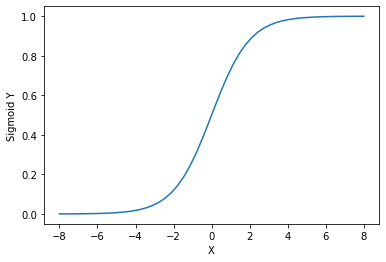

In [3]:
t = np.linspace(-8, 8, 50)
delta_t = sigmoid(t)
plt.plot(t, delta_t)
plt.xlabel("X")
plt.ylabel("Sigmoid Y")

而将$t$替换为线性回归模型$w^Tx^*$（这里$x^*=[x^T,1]^T$）即可得到逻辑回归模型：  
$$
f(x)=\delta(w^Tx^*)=\frac{1}{1+e^{-(w^Tx^*)}}
$$  
我们可以发现：  
$Sigmoid$函数决定了模型的输出在$(0,1)$区间，所以逻辑回归模型可以用作区间在$(0,1)$的回归任务，也可以用作$\{0,1\}$的二分类任务；同样，由于模型的输出在$(0,1)$区间，所以逻辑回归模型的输出也可以看作这样的“概率”模型：  
$$
P(y=1\mid x)=f(x)\\
P(y=0\mid x)=1-f(x)
$$  
所以，逻辑回归的学习目标可以通过极大似然估计求解： 
$\prod_{j=1}^n f(x_j)^{y_j}(1-f(x_j))^{(1-y_j)}$，即使得观测到的当前**所有样本**的所属类别概率尽可能大；通过对该函数取负对数，即可得到交叉熵损失函数：  
$$
L(w)=-\sum_{j=1}^n y_j log(f(x_j))+(1-y_j)log(1-f(x_j))
$$  
这里$n$表示样本量，$x_j\in R^m$，$m$表示特征量，$y_j\in \{0,1\}$，接下来的与之前推导一样，通过梯度下降求解$w$的更新公式即可：  
$$
\frac{\partial L}{\partial w}=-\sum_{i=1}^n (y_i-f(x_i))x_i^*
$$  
所以$w$的更新公式：  
$$
w:=w-\eta \frac{\partial L}{\partial w}
$$

## 2. 代码实现

In [4]:
def sign(x):
    """
    符号函数
    :param x:
    :return:
    """
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

In [5]:
class LogisticRegression(object):
    def __init__(self, fit_intercept=True, solver='sgd', if_standard=True, l1_ratio=None, l2_ratio=None, epochs=10,
                 eta=None, batch_size=16):

        self.w = None
        self.fit_intercept = fit_intercept
        self.solver = solver
        self.if_standard = if_standard
        if if_standard:
            self.feature_mean = None
            self.feature_std = None
        self.epochs = epochs
        self.eta = eta
        self.batch_size = batch_size
        self.l1_ratio = l1_ratio
        self.l2_ratio = l2_ratio
        # 注册sign函数
        self.sign_func = np.vectorize(sign)
        # 记录losses
        self.losses = []

    def init_params(self, n_features):
        """
        初始化参数
        :return:
        """
        self.w = np.random.random(size=(n_features, 1))

    def _fit_closed_form_solution(self, x, y):
        """
        直接求闭式解
        :param x:
        :param y:
        :return:
        """
        self._fit_sgd(x, y)

    def _fit_sgd(self, x, y):
        """
        随机梯度下降求解
        :param x:
        :param y:
        :return:
        """
        x_y = np.c_[x, y]
        count = 0
        for _ in range(self.epochs):
            np.random.shuffle(x_y)
            for index in range(x_y.shape[0] // self.batch_size):
                count += 1
                batch_x_y = x_y[self.batch_size * index:self.batch_size * (index + 1)]
                batch_x = batch_x_y[:, :-1]
                batch_y = batch_x_y[:, -1:]

                dw = -1 * (batch_y - sigmoid(batch_x.dot(self.w))).T.dot(batch_x) / self.batch_size
                dw = dw.T

                # 添加l1和l2的部分
                dw_reg = np.zeros(shape=(x.shape[1] - 1, 1))
                if self.l1_ratio is not None:
                    dw_reg += self.l1_ratio * self.sign_func(self.w[:-1]) / self.batch_size
                if self.l2_ratio is not None:
                    dw_reg += 2 * self.l2_ratio * self.w[:-1] / self.batch_size
                dw_reg = np.concatenate([dw_reg, np.asarray([[0]])], axis=0)

                dw += dw_reg
                self.w = self.w - self.eta * dw

            # 计算losses
            cost = -1 * np.sum(
                np.multiply(y, np.log(sigmoid(x.dot(self.w)))) + np.multiply(1 - y, np.log(
                    1 - sigmoid(x.dot(self.w)))))
            self.losses.append(cost)

    def fit(self, x, y):
        """
        :param x: ndarray格式数据: m x n
        :param y: ndarray格式数据: m x 1
        :return:
        """
        y = y.reshape(x.shape[0], 1)
        # 是否归一化feature
        if self.if_standard:
            self.feature_mean = np.mean(x, axis=0)
            self.feature_std = np.std(x, axis=0) + 1e-8
            x = (x - self.feature_mean) / self.feature_std
        # 是否训练bias
        if self.fit_intercept:
            x = np.c_[x, np.ones_like(y)]
        # 初始化参数
        self.init_params(x.shape[1])
        # 更新eta
        if self.eta is None:
            self.eta = self.batch_size / np.sqrt(x.shape[0])

        if self.solver == 'closed_form':
            self._fit_closed_form_solution(x, y)
        elif self.solver == 'sgd':
            self._fit_sgd(x, y)

    def get_params(self):
        """
        输出原始的系数
        :return: w,b
        """
        if self.fit_intercept:
            w = self.w[:-1]
            b = self.w[-1]
        else:
            w = self.w
            b = 0
        if self.if_standard:
            w = w / self.feature_std.reshape(-1, 1)
            b = b - w.T.dot(self.feature_mean.reshape(-1, 1))
        return w.reshape(-1), b

    def predict_proba(self, x):
        """
        预测为y=1的概率
        :param x:ndarray格式数据: m x n
        :return: m x 1
        """
        if self.if_standard:
            x = (x - self.feature_mean) / self.feature_std
        if self.fit_intercept:
            x = np.c_[x, np.ones(x.shape[0])]
        return sigmoid(x.dot(self.w))

    def predict(self, x):
        """
        预测类别，默认大于0.5的为1，小于0.5的为0
        :param x:
        :return:
        """
        proba = self.predict_proba(x)
        return (proba > 0.5).astype(int)

    def plot_decision_boundary(self, x, y):
        """
        绘制前两个维度的决策边界
        :param x:
        :param y:
        :return:
        """
        y = y.reshape(-1)
        weights, bias = self.get_params()
        w1 = weights[0]
        w2 = weights[1]
        bias = bias[0][0]
        x1 = np.arange(np.min(x), np.max(x), 0.1)
        x2 = -w1 / w2 * x1 - bias / w2
        plt.scatter(x[:, 0], x[:, 1], c=y, s=50)
        plt.plot(x1, x2, 'r')
        plt.show()

    def plot_losses(self):
        plt.plot(range(0, len(self.losses)), self.losses)
        plt.show()

## 3. 校验

我们构造一批伪分类数据并可视化

In [6]:
from sklearn.datasets import make_classification
data,target=make_classification(n_samples=100, n_features=2,n_classes=2,n_informative=1,n_redundant=0,n_repeated=0,n_clusters_per_class=1)

In [7]:
data.shape,target.shape

((100, 2), (100,))

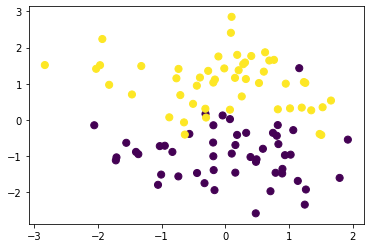

In [8]:
plt.scatter(data[:, 0], data[:, 1], c=target,s=50)

### 3.1 训练模型

In [9]:
lr = LogisticRegression(l1_ratio=0.01,l2_ratio=0.01)
lr.fit(data, target)

### 3.2 查看loss值变化

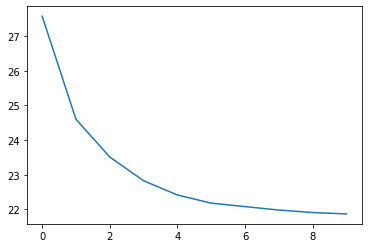

In [10]:
lr.plot_losses()

### 3.3 绘制决策边界：
令$w_1x_1+w_2x_2+b=0$，可得$x_2=-\frac{w_1}{w_2}x_1-\frac{b}{w_2}$

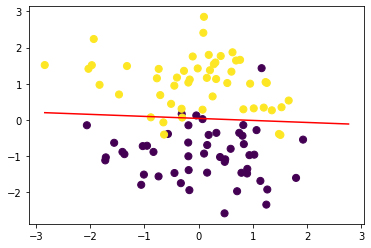

In [11]:
lr.plot_decision_boundary(data,target)

In [12]:
#计算F1
from sklearn.metrics import f1_score
f1_score(target,lr.predict(data))

0.9183673469387755

### 3.4 与sklearn对比

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(data, target)

LogisticRegression()

In [14]:
w1=lr.coef_[0][0]
w2=lr.coef_[0][1]
bias=lr.intercept_[0]
w1,w2,bias

(0.15765541001341216, 2.637929034981925, -0.020887884946693275)

In [15]:
x1=np.arange(np.min(data),np.max(data),0.1)
x2=-w1/w2*x1-bias/w2

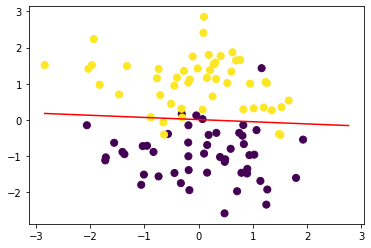

In [16]:
plt.scatter(data[:, 0], data[:, 1], c=target,s=50)
plt.plot(x1,x2,'r')

In [17]:
#计算F1
f1_score(target,lr.predict(data))

0.92

## 4. 问题讨论：

### 4.1 损失函数为何不用mse?

上面我们基本完成了二分类LogisticRegression代码的封装工作，并将其放到liner_model模块方便后续使用，接下来我们讨论一下模型中损失函数选择的问题；在前面线性回归模型中我们使用了mse作为损失函数，并取得了不错的效果，而逻辑回归中使用的确是交叉熵损失函数；这是因为如果使用mse作为损失函数,梯度下降将会比较困难，在$f(x^i)$与$y^i$相差较大或者较小时梯度值都会很小，下面推导一下：  
我们令：  
$$
L(w)=\frac{1}{2}\sum_{i=1}^n(y^i-f(x^i))^2
$$  
则有：  
$$
\frac{\partial L}{\partial w}=\sum_{i=1}^n(f(x^i)-y^i)f(x^i)(1-f(x^i))x^i
$$  
我们简单看两个极端的情况：  
（1）$y^i=0,f(x^i)=1$时，$\frac{\partial L}{\partial w}=0$；  
（2）$y^i=1,f(x^i)=0$时，$\frac{\partial L}{\partial w}=0$  
接下来，我们绘图对比一下两者梯度变化的情况，假设在$y=1,x\in(-10,10),w=1,b=0$的情况下

In [18]:
y=1
x0=np.arange(-10,10,0.5)
#交叉熵
x1=np.multiply(sigmoid(x0)-y,x0)

In [19]:
#mse
x2=np.multiply(sigmoid(x0)-y, sigmoid(x0))
x2=np.multiply(x2,1-sigmoid(x0))
x2=np.multiply(x2,x0)

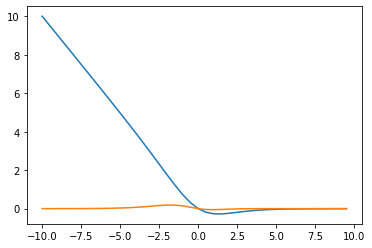

In [20]:
plt.plot(x0,x1)
plt.plot(x0,x2)

可见在错分的那一部分（x<0）,mse的梯度值基本停留在0附近，而交叉熵会让越“错”情况具有越大的梯度值（这里称呼梯度值不准确，你明白意思就行~）

## 5. 多分类

上一讲我们实现了一个简单二元分类器：LogisticRegression，但通常情况下，我们面对的更多是多分类器的问题，而二分类转多分类的通常做法也很朴素，一般分为两种：**one-vs-rest**以及**one-vs-one**。顾名思义，one-vs-rest将多类别中的其中一类作为正类，剩余其他所有类别作为负类，对于`n_class`类别的分类问题，需要构建$n\_class$种分类器；而one-vs-one是指进行两两分类，这样将会构造$n\_class*(n\_class-1)/2$种分类器，由于实现思路很简单，就直接贴出代码，将多分类实现封装到`MultiClassWrapper`类，并放到`ml_models.wrapper_models`包

In [21]:
#准备手写数据
from sklearn.metrics import f1_score
from sklearn import model_selection
from sklearn import datasets
digits = datasets.load_digits()
data = digits['data']
target = digits['target']
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target, test_size=0.3, random_state=0)

### 5.1 MultiClassWrapper类实现细节

In [22]:
import threading
import copy
import numpy as np

"""
继承Thread,获取函数的返回值
"""


class MyThread(threading.Thread):
    def __init__(self, target, args, kwargs, name=''):
        threading.Thread.__init__(self)
        self.name = name
        self.target = target
        self.args = args
        self.kwargs = kwargs
        self.result = self.target(*self.args, **self.kwargs)

    def get_result(self):
        try:
            return self.result
        except:
            return None


class MultiClassWrapper(object):
    def __init__(self, base_classifier, mode='ovr'):
        """
        :param base_classifier: 实例化后的分类器
        :param mode: 'ovr'表示one-vs-rest方式,'ovo'表示one-vs-one方式
        """
        self.base_classifier = base_classifier
        self.mode = mode

    @staticmethod
    def fit_base_classifier(base_classifier, x, y, **kwargs):
        base_classifier.fit(x, y, **kwargs)

    @staticmethod
    def predict_proba_base_classifier(base_classifier, x):
        return base_classifier.predict_proba(x)

    def fit(self, x, y, **kwargs):
        # 对y分组并行fit
        self.n_class = np.max(y)
        if self.mode == 'ovr':
            # 打包数据
            self.classifiers = []

            for cls in range(0, self.n_class + 1):
                self.classifiers.append(copy.deepcopy(self.base_classifier))
            # 并行训练
            tasks = []
            for cls in range(len(self.classifiers)):
                task = MyThread(target=self.fit_base_classifier,
                                args=(self.classifiers[cls], x, (y == cls).astype('int')), kwargs=kwargs)
                task.start()
                tasks.append(task)
            for task in tasks:
                task.join()
        elif self.mode == "ovo":
            # 打包数据
            self.classifiers = {}
            for first_cls in range(0, self.n_class):
                for second_cls in range(first_cls + 1, self.n_class + 1):
                    self.classifiers[(first_cls, second_cls)] = copy.deepcopy(self.base_classifier)
            # 并行训练
            tasks = {}
            for first_cls in range(0, self.n_class):
                for second_cls in range(first_cls + 1, self.n_class + 1):
                    index = np.where(y == first_cls)[0].tolist() + np.where(y == second_cls)[0].tolist()
                    new_x = x[index, :]
                    new_y = y[index]
                    task = MyThread(target=self.fit_base_classifier,
                                    args=(self.classifiers[(first_cls, second_cls)], new_x,
                                          (new_y == first_cls).astype('int')), kwargs=kwargs)
                    task.start()
                    tasks[(first_cls, second_cls)] = task
            for first_cls in range(0, self.n_class):
                for second_cls in range(first_cls + 1, self.n_class + 1):
                    tasks[(first_cls, second_cls)].join()

    def predict_proba(self, x, **kwargs):
        if self.mode == 'ovr':
            tasks = []
            probas = []
            for cls in range(len(self.classifiers)):
                task = MyThread(target=self.predict_proba_base_classifier, args=(self.classifiers[cls], x),
                                kwargs=kwargs)
                task.start()
                tasks.append(task)
            for task in tasks:
                task.join()
            for task in tasks:
                probas.append(task.get_result())
            total_probas = np.concatenate(probas, axis=1)
            # 归一化
            return total_probas / total_probas.sum(axis=1, keepdims=True)
        elif self.mode == 'ovo':
            tasks = {}
            probas = {}
            for first_cls in range(0, self.n_class):
                for second_cls in range(first_cls + 1, self.n_class + 1):
                    task = MyThread(target=self.predict_proba_base_classifier,
                                    args=(self.classifiers[(first_cls, second_cls)], x), kwargs=kwargs)
                    task.start()
                    tasks[(first_cls, second_cls)] = task
            for first_cls in range(0, self.n_class):
                for second_cls in range(first_cls + 1, self.n_class + 1):
                    tasks[(first_cls, second_cls)].join()
            for first_cls in range(0, self.n_class):
                for second_cls in range(first_cls + 1, self.n_class + 1):
                    probas[(first_cls, second_cls)] = tasks[(first_cls, second_cls)].get_result()
                    probas[(second_cls, first_cls)] = 1.0 - probas[(first_cls, second_cls)]
            # 统计概率
            total_probas = []
            for first_cls in range(0, self.n_class + 1):
                temp = []
                for second_cls in range(0, self.n_class + 1):
                    if first_cls != second_cls:
                        temp.append(probas[(first_cls, second_cls)])
                temp = np.concatenate(temp, axis=1).sum(axis=1, keepdims=True)
                total_probas.append(temp)
            # 归一化
            total_probas = np.concatenate(total_probas, axis=1)
            return total_probas / total_probas.sum(axis=1, keepdims=True)

    def predict(self, x):
        return np.argmax(self.predict_proba(x), axis=1)

In [23]:
#构建初始模型
lr = LogisticRegression()

In [24]:
#进行one-vs-rest训练并评估
ovr = MultiClassWrapper(lr, mode='ovr')
ovr.fit(X_train, y_train)

y = ovr.predict(X_test)
print('ovr:', f1_score(y_test, y, average='macro'))

/Users/hezhiqiang01/Desktop/anaconda/anaconda3/envs/ACG/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/hezhiqiang01/Desktop/anaconda/anaconda3/envs/ACG/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver o

ovr: 0.022925518586622565


/Users/hezhiqiang01/Desktop/anaconda/anaconda3/envs/ACG/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/hezhiqiang01/Desktop/anaconda/anaconda3/envs/ACG/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver o

In [25]:
#进行one-vs-one训练并评估
ovo = MultiClassWrapper(lr, mode='ovo')
ovo.fit(X_train, y_train)

y = ovo.predict(X_test)
print('ovo:', f1_score(y_test, y, average='macro'))

/Users/hezhiqiang01/Desktop/anaconda/anaconda3/envs/ACG/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/hezhiqiang01/Desktop/anaconda/anaconda3/envs/ACG/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver o

ovo: 0.022268925770247434


/Users/hezhiqiang01/Desktop/anaconda/anaconda3/envs/ACG/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/hezhiqiang01/Desktop/anaconda/anaconda3/envs/ACG/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver o